In [2]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
ds = pd.read_csv("C:/Users/Homka/Desktop/variant_4.csv")

In [4]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))


columns count -  43 

columns:  ['Unnamed: 0', 'Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 

In [5]:
ds.shape

(4424, 43)

In [6]:
missing = []

for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Course 221
Daytime/evening attendance	 110
Previous qualification 221
Previous qualification (grade) 2323
Mother's occupation 221
Father's occupation 110
International 325
Curricular units 1st sem (enrolled) 221
Curricular units 1st sem (approved) 221
Curricular units 1st sem (grade) 435
Curricular units 1st sem (without evaluations) 2212
Curricular units 2nd sem (credited) 221
Curricular units 2nd sem (enrolled) 110
Curricular units 2nd sem (evaluations) 110
Curricular units 2nd sem (grade) 110
Inflation rate 110
Citizenship 465
Family Position 2323
Special Needs 2212


In [7]:
# let's make a function to fill missing values:
# the variable takes the dataframe, the variable, and the value for imputation
# and returns the variable with the filled na


def impute_na(df, variable, value):

    return df[variable].fillna(value)

In [8]:
def impute_na(ds, variable, value):

    return ds[variable].fillna(value)

In [9]:

# Getting unique values from the 'Citizenship' column
unique_citizenship_values = ds['Special Needs'].unique()
unique_citizenship_values

array(['Special Needs', nan, 'No Special Needs'], dtype=object)

In [10]:

# Припустимо, що дані зберігаються у DataFrame під назвою `df`.
# Перелік колонок, які будемо заповнювати модою
columns_to_fill = [
    'Daytime/evening attendance\t',
    'Previous qualification',
    'Mother\'s occupation',
    'Father\'s occupation',
    'International',
    'Family Position',
    'Special Needs',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)'
]

# Заповнюємо пропущені значення модою для кожної колонки
for column in columns_to_fill:
    mode_value = ds[column].mode()[0]  # обчислюємо моду для кожної колонки
    ds[column].fillna(mode_value, inplace=True)

# Перевіряємо, чи є пропущені значення після заповнення
missing_values_after = ds[columns_to_fill].isnull().sum()

missing_values_after


Daytime/evening attendance\t                      0
Previous qualification                            0
Mother's occupation                               0
Father's occupation                               0
International                                     0
Family Position                                   0
Special Needs                                     0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
dtype: int64

In [11]:
missing = []

for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Course 221
Previous qualification (grade) 2323
Curricular units 1st sem (enrolled) 221
Curricular units 1st sem (approved) 221
Curricular units 1st sem (grade) 435
Curricular units 2nd sem (enrolled) 110
Curricular units 2nd sem (evaluations) 110
Curricular units 2nd sem (grade) 110
Inflation rate 110
Citizenship 465


In [12]:
# Припустимо, що дані зберігаються у DataFrame під назвою df

# Перелік колонок, які будемо заповнювати медіаною
columns_to_fill_median = [
    'Previous qualification (grade)',  # Оцінка попередньої кваліфікації
    'Curricular units 1st sem (grade)',  # Оцінка за 1-й семестр
    'Curricular units 2nd sem (grade)',  # Оцінка за 2-й семестр
    'Inflation rate'  # Інфляція
]

# Заповнюємо пропущені значення медіаною для кожної колонки
for column in columns_to_fill_median:
    median_value = ds[column].median()  # обчислюємо медіану для кожної колонки
    ds[column].fillna(median_value, inplace=True)

# Перевіряємо, чи є пропущені значення після заповнення
missing_values_after = ds[columns_to_fill_median].isnull().sum()

missing_values_after


Previous qualification (grade)      0
Curricular units 1st sem (grade)    0
Curricular units 2nd sem (grade)    0
Inflation rate                      0
dtype: int64

In [13]:
missing = []

for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Course 221
Curricular units 1st sem (enrolled) 221
Curricular units 1st sem (approved) 221
Curricular units 2nd sem (enrolled) 110
Curricular units 2nd sem (evaluations) 110
Citizenship 465


In [14]:
mode_value = ds['Course'].mode()[0]  # обчислюємо моду
ds['Course'].fillna(mode_value, inplace=True)

# Або, щоб заповнити значенням за замовчуванням
# df['Course'].fillna(course_options[0], inplace=True)  # Наприклад, заповнюємо першим значенням

# Перевірка результату
print(ds)

      Unnamed: 0  Marital status  Application mode  Application order  Course  \
0              0               1                17                  5   171.0   
1              1               1                15                  1  9254.0   
2              2               1                 1                  5  9070.0   
3              3               1                17                  2  9773.0   
4              4               2                39                  1  8014.0   
...          ...             ...               ...                ...     ...   
4419        4419               1                 1                  6  9773.0   
4420        4420               1                 1                  2  9773.0   
4421        4421               1                 1                  1  9500.0   
4422        4422               1                 1                  1  9147.0   
4423        4423               1                10                  1  9773.0   

      Daytime/evening atten

In [15]:
missing = []

for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Curricular units 1st sem (enrolled) 221
Curricular units 1st sem (approved) 221
Curricular units 2nd sem (enrolled) 110
Curricular units 2nd sem (evaluations) 110
Citizenship 465


In [16]:
# Виводимо унікальні значення колонки
unique_values = ds['Curricular units 1st sem (enrolled)'].unique()

print(unique_values)

[ 0.  6.  5.  7.  8. nan  1. 12. 10. 18.  9. 21.  3. 17. 11. 14. 13.  2.
 16.  4. 15. 19. 23.]


In [17]:
# Обчислюємо медіану
median_value = ds['Curricular units 1st sem (enrolled)'].median()

# Заповнюємо пропуски медіаною
ds['Curricular units 1st sem (enrolled)'].fillna(median_value, inplace=True)
missing_values_after = ds['Curricular units 1st sem (enrolled)'].isnull().sum()

missing_values_after

0

In [18]:
missing = []

for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Curricular units 1st sem (approved) 221
Curricular units 2nd sem (enrolled) 110
Curricular units 2nd sem (evaluations) 110
Citizenship 465


In [19]:
median_value = ds['Curricular units 1st sem (approved)'].median()

# Заповнюємо пропуски медіаною
ds['Curricular units 1st sem (approved)'].fillna(median_value, inplace=True)


In [20]:
missing = []

for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Curricular units 2nd sem (enrolled) 110
Curricular units 2nd sem (evaluations) 110
Citizenship 465


In [21]:

# Заповнення для 'Curricular units 2nd sem (enrolled)'
median_enrolled = ds['Curricular units 2nd sem (enrolled)'].median()
ds['Curricular units 2nd sem (enrolled)'].fillna(median_enrolled, inplace=True)

# Заповнення для 'Curricular units 2nd sem (evaluations)'
median_evaluations = ds['Curricular units 2nd sem (evaluations)'].median()
ds['Curricular units 2nd sem (evaluations)'].fillna(median_evaluations, inplace=True)


In [22]:

# Заповнення пропусків модою
mode_citizenship = ds['Citizenship'].mode()[0]
ds['Citizenship'].fillna(mode_citizenship, inplace=True)

In [23]:
from sklearn.preprocessing import OneHotEncoder


In [24]:
ds.nunique()

Unnamed: 0                                        4424
Marital status                                       6
Application mode                                    18
Application order                                    8
Course                                              17
Daytime/evening attendance\t                         2
Previous qualification                              17
Previous qualification (grade)                      84
Nacionality                                         21
Mother's qualification                              29
Father's qualification                              34
Mother's occupation                                 32
Father's occupation                                 46
Admission grade                                    620
Displaced                                            2
Educational special needs                            2
Debtor                                               2
Tuition fees up to date                              2
Gender    

In [25]:
# Перевірка кількості унікальних значень
unique_counts = ds.nunique()

# Перевірка типів даних
data_types = ds.dtypes

print(unique_counts)
print(data_types)


Unnamed: 0                                        4424
Marital status                                       6
Application mode                                    18
Application order                                    8
Course                                              17
Daytime/evening attendance\t                         2
Previous qualification                              17
Previous qualification (grade)                      84
Nacionality                                         21
Mother's qualification                              29
Father's qualification                              34
Mother's occupation                                 32
Father's occupation                                 46
Admission grade                                    620
Displaced                                            2
Educational special needs                            2
Debtor                                               2
Tuition fees up to date                              2
Gender    

In [26]:
# Створення словника для відображення категорій у числа
ordinal_mapping = {
    k: i
    for i, k in enumerate(ds['Target'].unique(), 0)
}

# Виводимо словник
print("Ordinal Mapping:", ordinal_mapping)

# Використовуємо словник для кодування цільової змінної 'Target'
ds['Target'] = ds['Target'].map(ordinal_mapping)

# Перевіряємо результати
print(ds['Target'])

Ordinal Mapping: {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}
0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 4424, dtype: int64


In [27]:

# Функція для створення словника і кодування
def integer_encoding(column):
    ordinal_mapping = {
        k: i for i, k in enumerate(column.unique(), 0)
    }
    return column.map(ordinal_mapping), ordinal_mapping

# Кодування 'Family Position'
ds['Family Position'], family_position_mapping = integer_encoding(ds['Family Position'])

# Кодування 'Special Needs'
ds['Special Needs'], special_needs_mapping = integer_encoding(ds['Special Needs'])

# Виводимо результати
print("Family Position Mapping:", family_position_mapping)
print("Special Needs Mapping:", special_needs_mapping)
print(ds['Family Position'], ds['Special Needs'])

Family Position Mapping: {'Youngest Child': 0, 'Middle Child': 1, 'First Child': 2}
Special Needs Mapping: {'Special Needs': 0, 'No Special Needs': 1}
0       0
1       1
2       1
3       1
4       0
       ..
4419    1
4420    1
4421    1
4422    1
4423    1
Name: Family Position, Length: 4424, dtype: int64 0       0
1       0
2       0
3       1
4       1
       ..
4419    0
4420    0
4421    0
4422    0
4423    0
Name: Special Needs, Length: 4424, dtype: int64


In [28]:
citizenship_mapping = {citizen: idx for idx, citizen in enumerate(ds['Citizenship'].unique())}

# Виводимо словник для перевірки
print(citizenship_mapping)

# Кодуємо дані
ds['Citizenship'] = ds['Citizenship'].map(citizenship_mapping)
print(ds['Citizenship'])

{'Budapest': 0, 'Oslo': 1, 'Edinburgh': 2, 'London': 3, 'Saint Petersburg': 4, 'Prague': 5, 'Amsterdam': 6, 'Istanbul': 7, 'Barcelona': 8, 'Bucharest': 9, 'Copenhagen': 10, 'Kyiv': 11, 'Stockholm': 12, 'Madrid': 13, 'Paris': 14, 'Lisbon': 15, 'Vienna': 16, 'Milan': 17, 'Berlin': 18, 'Brussels': 19, 'Venice': 20, 'Athens': 21, 'Helsinki': 22, 'Sofia': 23, 'Munich': 24, 'Warsaw': 25, 'Zurich': 26, 'Rome': 27, 'Dublin': 28}
0        0
1        1
2        2
3        0
4        3
        ..
4419    18
4420     4
4421    19
4422     7
4423     9
Name: Citizenship, Length: 4424, dtype: int64


In [29]:
# Створюємо словник для Attendance
attendance_mapping = {attendance: idx for idx, attendance in enumerate(ds['Attendance'].unique())}

# Виводимо словник для перевірки
print(attendance_mapping)

# Кодуємо дані
ds['Attendance'] = ds['Attendance'].map(attendance_mapping)


{'Online': 0, 'Full-Time': 1, 'Part-Time': 2, 'Evening Classes': 3}


In [30]:
# Створюємо словник для Field of Study
field_of_study_mapping = {field: idx for idx, field in enumerate(ds['Field of Study'].unique())}

# Виводимо словник для перевірки
print(field_of_study_mapping)

# Кодуємо дані
ds['Field of Study'] = ds['Field of Study'].map(field_of_study_mapping)


{'Science': 0, 'Arts': 1, 'Commerce': 2, 'Medicine': 3, 'Engineering': 4}


In [31]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [32]:
print(ds.columns)

Index(['Unnamed: 0', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curric

In [33]:

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

# Знайдіть усі числові колонки у DataFrame
numeric_columns = ds.select_dtypes(include=['number']).columns.tolist()

# Обчисліть межі викидів для всіх числових колонок
for column in numeric_columns:
    upper_limit, lower_limit = find_skewed_boundaries(ds, column, 4)
    print(f'Column: {column}, Upper Limit: {upper_limit}, Lower Limit: {lower_limit}')


Column: Unnamed: 0, Upper Limit: 12163.25, Lower Limit: -7740.25
Column: Marital status, Upper Limit: 1.0, Lower Limit: 1.0
Column: Application mode, Upper Limit: 191.0, Lower Limit: -151.0
Column: Application order, Upper Limit: 6.0, Lower Limit: -3.0
Column: Course, Upper Limit: 11160.0, Lower Limit: 7425.0
Column: Daytime/evening attendance	, Upper Limit: 1.0, Lower Limit: 1.0
Column: Previous qualification, Upper Limit: 1.0, Lower Limit: 1.0
Column: Previous qualification (grade), Upper Limit: 133.1, Lower Limit: 133.1
Column: Nacionality, Upper Limit: 1.0, Lower Limit: 1.0
Column: Mother's qualification, Upper Limit: 177.0, Lower Limit: -138.0
Column: Father's qualification, Upper Limit: 173.0, Lower Limit: -133.0
Column: Mother's occupation, Upper Limit: 29.0, Lower Limit: -16.0
Column: Father's occupation, Upper Limit: 29.0, Lower Limit: -16.0
Column: Admission grade, Upper Limit: 202.40000000000003, Lower Limit: 50.29999999999998
Column: Displaced, Upper Limit: 5.0, Lower Limit

In [34]:
print(ds)

      Unnamed: 0  Marital status  Application mode  Application order  Course  \
0              0               1                17                  5   171.0   
1              1               1                15                  1  9254.0   
2              2               1                 1                  5  9070.0   
3              3               1                17                  2  9773.0   
4              4               2                39                  1  8014.0   
...          ...             ...               ...                ...     ...   
4419        4419               1                 1                  6  9773.0   
4420        4420               1                 1                  2  9773.0   
4421        4421               1                 1                  1  9500.0   
4422        4422               1                 1                  1  9147.0   
4423        4423               1                10                  1  9773.0   

      Daytime/evening atten

In [35]:
# Припустимо, що ви вже закодували дані і ваша таблиця зберігається у змінній ds

# Функція для виявлення викидів
def flag_outliers(df, variable):
    upper_limit, lower_limit = find_skewed_boundaries(df, variable, 100)
    return np.where(df[variable] > upper_limit, True, 
                    np.where(df[variable] < lower_limit, True, False))

# Створюємо новий DataFrame для зберігання викидів
outliers_df = pd.DataFrame()

# Перебираємо числові стовпці
for column in ds.select_dtypes(include=[np.number]).columns:
    outliers_df[column] = flag_outliers(ds, column)

# Виводимо результат
outliers_df.head()


,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Citizenship,Family Position,Attendance,Field of Study,Special Needs
0,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True


In [36]:
# Створимо список для зберігання всіх викидів
all_outliers = pd.Series(False, index=ds.index)

# Перебір кожного числового стовпця
for column in ds.columns:
    # Якщо стовпець числовий, знайдемо межі для викидів
    if np.issubdtype(ds[column].dtype, np.number):
        upper_limit, lower_limit = find_skewed_boundaries(ds, column, 4)
        
        # Визначимо викиди для поточного стовпця
        outliers = (ds[column] > upper_limit) | (ds[column] < lower_limit)
        
        # Додаємо викиди до загального списку
        all_outliers = all_outliers | outliers

# Обрізаємо викиди
ds_trimmed = ds.loc[~all_outliers]

# Виведемо форми початкового та обрізаного наборів даних
print("Original shape:", ds.shape)
print("Trimmed shape:", ds_trimmed.shape)


Original shape: (4424, 43)
Trimmed shape: (648, 43)


In [37]:
import numpy as np
import pandas as pd

# Припустимо, що ds — це ваш DataFrame
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

# Список кількісних стовпців
quantitative_columns = [
    'Admission grade', 'Age at enrollment', 
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate', 'GDP', 'Target'
]

# Зберігайте межі викидів для кожного стовпця
outlier_boundaries = {}

for column in quantitative_columns:
    upper_limit, lower_limit = find_skewed_boundaries(ds, column, 1.5)
    outlier_boundaries[column] = (upper_limit, lower_limit)

outlier_boundaries


{'Admission grade': (160.15000000000003, 92.55),
 'Age at enrollment': (34.0, 10.0),
 'Curricular units 1st sem (credited)': (0.0, 0.0),
 'Curricular units 1st sem (enrolled)': (10.0, 2.0),
 'Curricular units 1st sem (evaluations)': (16.0, 0.0),
 'Curricular units 1st sem (approved)': (10.5, -1.5),
 'Curricular units 1st sem (grade)': (16.252343749999998, 8.248593750000001),
 'Curricular units 2nd sem (credited)': (0.0, 0.0),
 'Curricular units 2nd sem (enrolled)': (10.0, 2.0),
 'Curricular units 2nd sem (evaluations)': (16.0, 0.0),
 'Curricular units 2nd sem (approved)': (12.0, -4.0),
 'Curricular units 2nd sem (grade)': (17.03540476190476, 7.163214285714287),
 'Unemployment rate': (20.65, 2.6500000000000004),
 'Inflation rate': (6.050000000000001, -3.1500000000000004),
 'GDP': (7.025, -6.9350000000000005),
 'Target': (2.5, -1.5)}

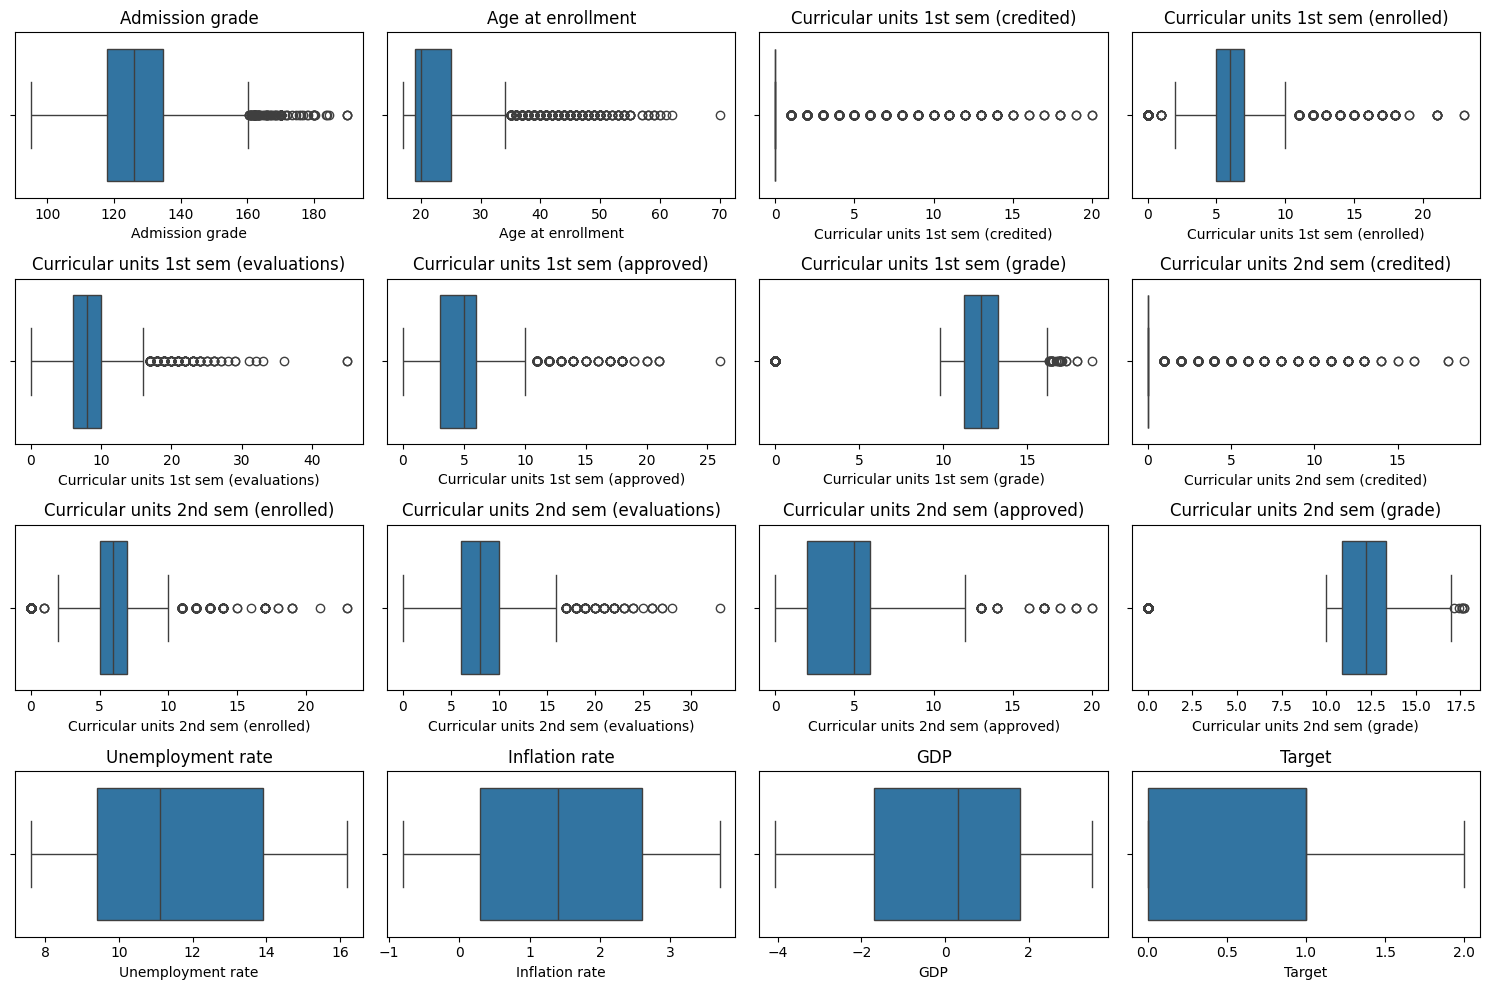

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Створіть ящик з вусами для візуалізації викидів
plt.figure(figsize=(15, 10))
for i, column in enumerate(quantitative_columns):
    plt.subplot(4, 4, i + 1)  # 4x4 підграфіки
    sns.boxplot(x=ds[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [38]:
# Список якісних стовпців
qualitative_columns = ['Marital status', 'Application mode', 'Course', 'Gender']

# Перегляд частот
for column in qualitative_columns:
    print(f"Frequency for {column}:\n{ds[column].value_counts()}\n")


Frequency for Marital status:
Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64

Frequency for Application mode:
Application mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64

Frequency for Course:
Course
9500.0    946
9147.0    365
9238.0    345
9773.0    316
9085.0    311
9670.0    256
9991.0    253
9254.0    243
9070.0    216
9003.0    203
8014.0    202
171.0     201
9853.0    182
9119.0    161
9130.0    132
9556.0     80
33.0       12
Name: count, dtype: int64

Frequency for Gender:
Gender
0    2868
1    1556
Name: count, dtype: int64



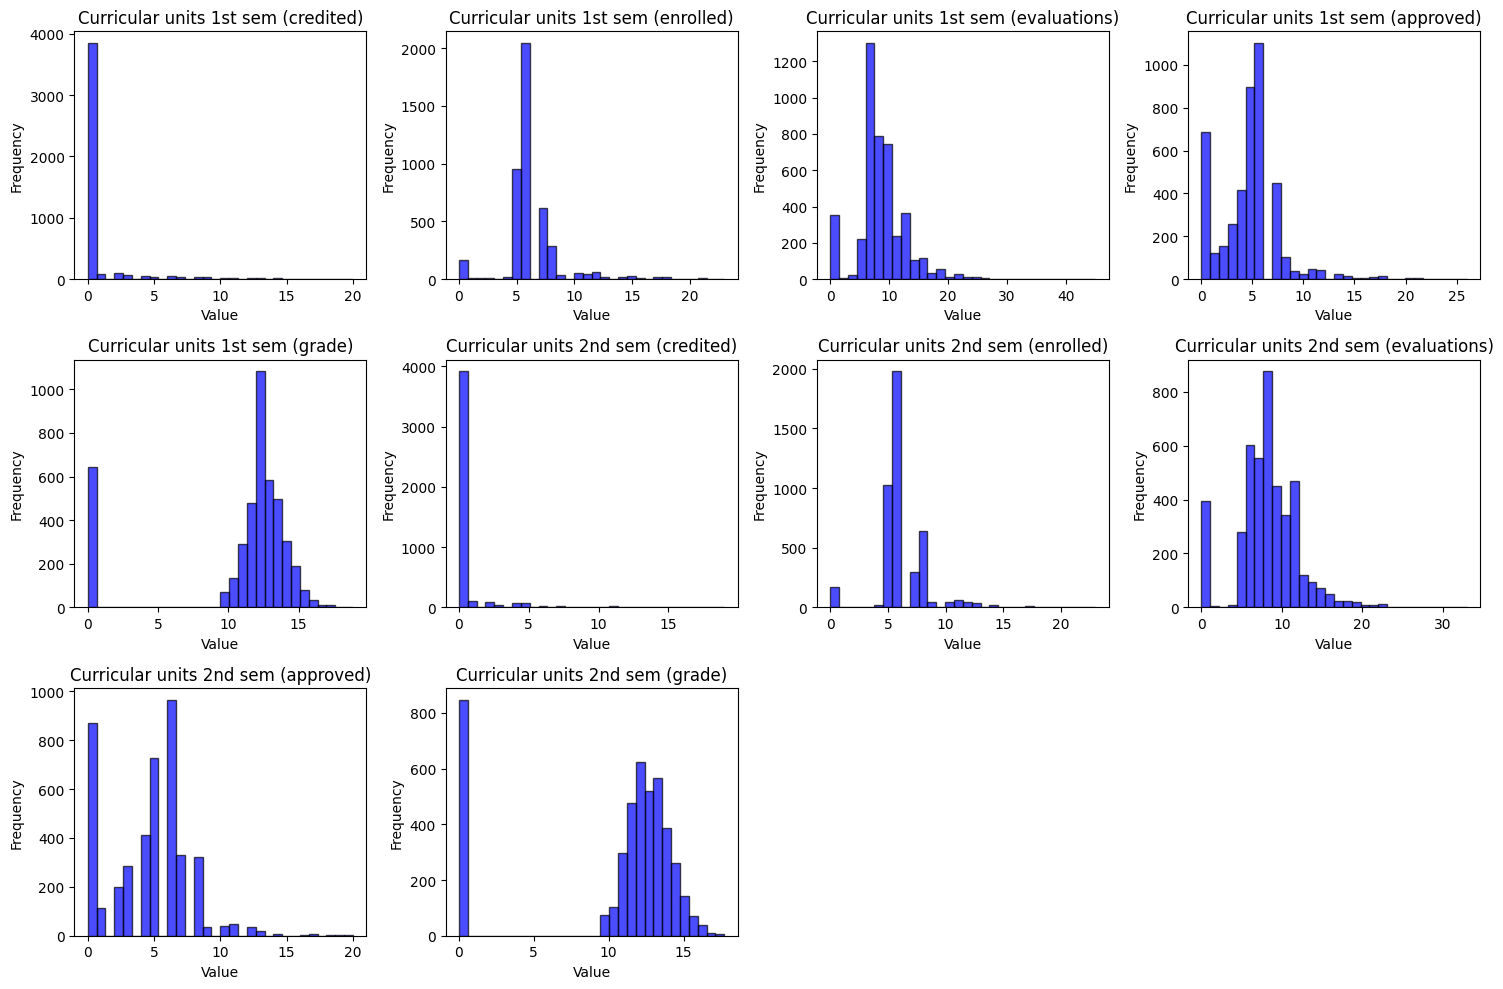

In [39]:
import matplotlib.pyplot as plt

# Визначте стовпці для візуалізації
curricular_columns = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
]

# Створіть графіки
plt.figure(figsize=(15, 10))

# Проходьте по кожному стовпцю та створюйте гістограми
for i, column in enumerate(curricular_columns):
    plt.subplot(3, 4, i + 1)  # 3 рядки і 4 стовпці
    plt.hist(ds[column], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [40]:
# Заміна нульових значень на медіану в стовпці 'Curricular units 2nd sem (grade)'
median_value = ds['Curricular units 2nd sem (grade)'].median()
ds['Curricular units 2nd sem (grade)'] = ds['Curricular units 2nd sem (grade)'].replace(0, median_value)

# Перевірка, чи зміни відбулися
print(ds['Curricular units 2nd sem (grade)'].value_counts())


Curricular units 2nd sem (grade)
12.200000    1001
12.000000     168
11.000000     161
13.000000     147
11.500000      84
             ... 
13.385000       1
14.725714       1
13.137500       1
12.281250       1
11.083333       1
Name: count, Length: 773, dtype: int64


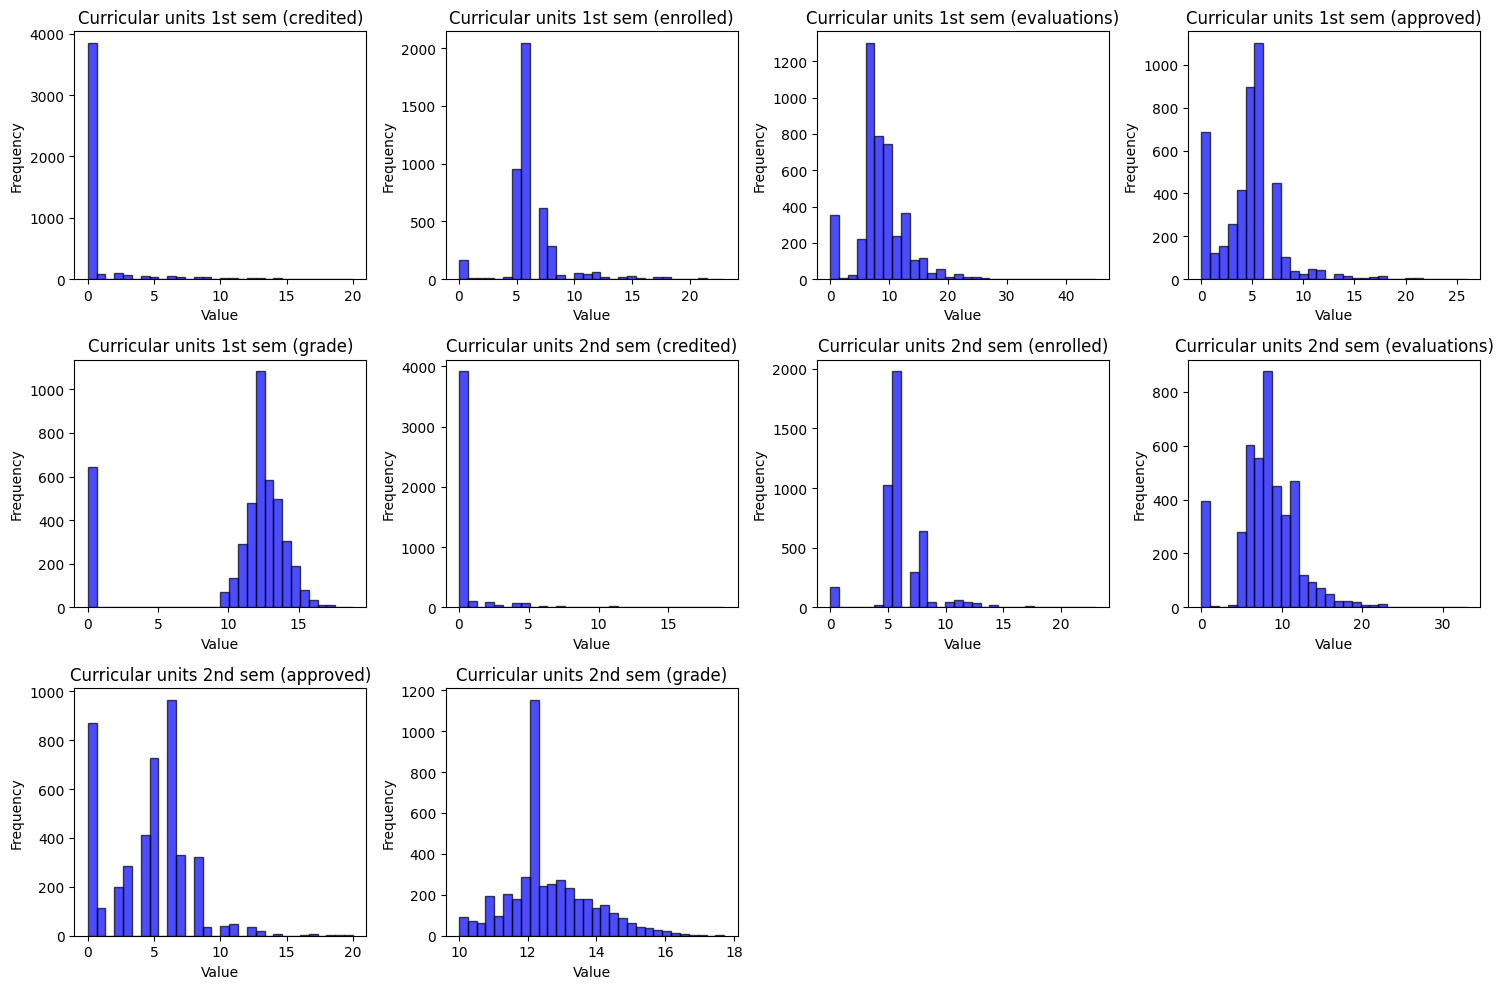

In [41]:
import matplotlib.pyplot as plt

# Визначте стовпці для візуалізації
curricular_columns = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
]

# Створіть графіки
plt.figure(figsize=(15, 10))

# Проходьте по кожному стовпцю та створюйте гістограми
for i, column in enumerate(curricular_columns):
    plt.subplot(3, 4, i + 1)  # 3 рядки і 4 стовпці
    plt.hist(ds[column], bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [42]:
print(ds)

      Unnamed: 0  Marital status  Application mode  Application order  Course  \
0              0               1                17                  5   171.0   
1              1               1                15                  1  9254.0   
2              2               1                 1                  5  9070.0   
3              3               1                17                  2  9773.0   
4              4               2                39                  1  8014.0   
...          ...             ...               ...                ...     ...   
4419        4419               1                 1                  6  9773.0   
4420        4420               1                 1                  2  9773.0   
4421        4421               1                 1                  1  9500.0   
4422        4422               1                 1                  1  9147.0   
4423        4423               1                10                  1  9773.0   

      Daytime/evening atten

In [43]:
# Підрахунок кількості викидів у кожному стовпці

# Створюємо DataFrame для зберігання кількості викидів
outlier_counts = {}

for column in quantitative_columns:
    upper_limit, lower_limit = outlier_boundaries[column]
    # Підрахунок кількості викидів
    outliers = ds[(ds[column] > upper_limit) | (ds[column] < lower_limit)]
    outlier_counts[column] = outliers.shape[0]

outlier_counts


{'Admission grade': 86,
 'Age at enrollment': 441,
 'Curricular units 1st sem (credited)': 577,
 'Curricular units 1st sem (enrolled)': 403,
 'Curricular units 1st sem (evaluations)': 158,
 'Curricular units 1st sem (approved)': 172,
 'Curricular units 1st sem (grade)': 673,
 'Curricular units 2nd sem (credited)': 508,
 'Curricular units 2nd sem (enrolled)': 361,
 'Curricular units 2nd sem (evaluations)': 108,
 'Curricular units 2nd sem (approved)': 44,
 'Curricular units 2nd sem (grade)': 7,
 'Unemployment rate': 0,
 'Inflation rate': 0,
 'GDP': 0,
 'Target': 0}

In [44]:
median_value = ds['Curricular units 2nd sem (credited)'].median()
ds['Curricular units 2nd sem (credited)'] = ds['Curricular units 2nd sem (credited)'].replace(0, median_value)

# Перевірка, чи зміни відбулися
print(ds['Curricular units 2nd sem (credited)'].value_counts())


Curricular units 2nd sem (credited)
0.0     3916
1.0      100
2.0       90
4.0       76
5.0       65
3.0       45
6.0       25
11.0      19
7.0       16
12.0      14
9.0       14
10.0      13
8.0       12
13.0       9
14.0       3
15.0       2
16.0       2
18.0       2
19.0       1
Name: count, dtype: int64


In [1]:
# Підрахунок кількості викидів у кожному стовпці

# Створюємо DataFrame для зберігання кількості викидів
outlier_counts = {}

for column in quantitative_columns:
    upper_limit, lower_limit = outlier_boundaries[column]
    # Підрахунок кількості викидів
    outliers = ds[(ds[column] > upper_limit) | (ds[column] < lower_limit)]
    outlier_counts[column] = outliers.shape[0]

outlier_counts


NameError: name 'quantitative_columns' is not defined

In [46]:
import numpy as np
import pandas as pd
from scipy import stats

# Визначення колонок, для яких будемо виключати викиди
outlier_columns = [
    'Admission grade', 'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate',
    'GDP', 'Target'
]

# Видалення викидів з набору даних
ds_cleaned = ds[(np.abs(stats.zscore(ds[outlier_columns])) < 3).all(axis=1)]

# Перевірка наявності викидів
print(f'Кількість рядків після видалення викидів: {ds_cleaned.shape[0]}')


Кількість рядків після видалення викидів: 4108


In [47]:
# Підрахунок кількості викидів у кожному стовпці

# Створюємо DataFrame для зберігання кількості викидів
outlier_counts = {}

for column in quantitative_columns:
    upper_limit, lower_limit = outlier_boundaries[column]
    # Підрахунок кількості викидів
    outliers = ds[(ds[column] > upper_limit) | (ds[column] < lower_limit)]
    outlier_counts[column] = outliers.shape[0]

outlier_counts


{'Admission grade': 86,
 'Age at enrollment': 441,
 'Curricular units 1st sem (credited)': 577,
 'Curricular units 1st sem (enrolled)': 403,
 'Curricular units 1st sem (evaluations)': 158,
 'Curricular units 1st sem (approved)': 172,
 'Curricular units 1st sem (grade)': 673,
 'Curricular units 2nd sem (credited)': 508,
 'Curricular units 2nd sem (enrolled)': 361,
 'Curricular units 2nd sem (evaluations)': 108,
 'Curricular units 2nd sem (approved)': 44,
 'Curricular units 2nd sem (grade)': 7,
 'Unemployment rate': 0,
 'Inflation rate': 0,
 'GDP': 0,
 'Target': 0}

In [48]:
# Список допустимих значень для колонки 'Target'
valid_target_values = [0, 1, 2]

# Перевірка наявності недопустимих значень у колонці 'Target'
if 'Target' in ds.columns:
    invalid_target_values = ds['Target'][~ds['Target'].isin(valid_target_values)].unique()
    if len(invalid_target_values) > 0:
        print(f"У колонці 'Target' є недопустимі значення: {invalid_target_values}")
    else:
        print("У колонці 'Target' немає недопустимих значень.")


У колонці 'Target' немає недопустимих значень.


In [49]:
# Оновлений словник з допустимими значеннями
valid_values = {
    'Marital Status': [1, 2, 3, 4, 5, 6],
    'Application mode': [1, 2, 5, 7, 10, 15, 16, 17, 18, 26, 27, 39, 42, 43, 44, 51, 53, 57],
    'Application order': list(range(10)),  # 0-9
    'Course': [
        33, 171, 8014, 9003, 9070, 9085, 9119,
        9130, 9147, 9238, 9254, 9500, 9556,
        9670, 9773, 9853, 9991
    ],
    'Daytime/evening attendance': [0, 1],
    'Previous qualification': list(range(1, 7)) + [9, 10, 12, 14, 15, 19, 38, 39, 40, 42, 43],
    'Nacionality': [1, 2, 6, 11, 13, 14, 17, 21, 22, 24, 25, 26, 32, 41, 62, 100, 101, 103, 105, 108, 109],
    'Mother\'s qualification': [
        1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 18,
        19, 22, 26, 27, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44
    ],
    'Father\'s qualification': [
        1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14,
        18, 19, 20, 22, 25, 26, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44
    ],
    'Mother\'s occupation': list(range(0, 10)) + [90, 99, 122, 123, 125, 131, 132, 134, 141, 143, 144, 151, 152, 153, 171, 173, 175, 191, 192, 193, 194],
    'Father\'s occupation': list(range(0, 10)) + [90, 99, 101, 102, 103, 112, 114, 121, 122, 123, 124, 131, 132, 134, 135, 141, 143, 144, 151, 152, 153, 154, 161, 163, 171, 172, 174, 175, 181, 182, 183, 192, 193, 194, 195],
    'Displaced': [0, 1],
    'Educational special needs': [0, 1],
    'Debtor': [0, 1],
    'Tuition fees up to date': [0, 1],
    'Gender': [0, 1],
    'Scholarship holder': [0, 1],
    'Age at enrollment': list(range(1, 90)),  # допустимо вказати відповідний діапазон
    'International': [0, 1],
    'Curricular units 1st sem (credited)': list(range(0, 100)),  # приклад
    'Curricular units 1st sem (enrolled)': list(range(0, 100)),  # приклад
    'Curricular units 1st sem (evaluations)': list(range(0, 100)),  # приклад
    'Curricular units 1st sem (approved)': list(range(0, 100)),  # приклад
    'Curricular units 1st sem (without evaluations)': list(range(0, 100)),  # приклад
    'Curricular units 2nd sem (credited)': list(range(0, 100)),  # приклад
    'Curricular units 2nd sem (enrolled)': list(range(0, 100)),  # приклад
    'Curricular units 2nd sem (evaluations)': list(range(0, 100)),  # приклад
    'Curricular units 2nd sem (approved)': list(range(0, 100)),  # приклад
    'Curricular units 2nd sem (without evaluations)': list(range(0, 100)),  # приклад
}

for column, valid in valid_values.items():
    if column in ds.columns:
        # Перевіряємо, чи є колонка числовою
        if ds[column].dtype in ['float64', 'int64', 'object']:  # 'object' може містити текстові значення
            try:
                # Спробуємо замінити ',' на '.' та перетворити на float
                ds[column] = ds[column].astype(str).str.replace(',', '.')
                ds[column] = ds[column].astype(float)
            except ValueError as e:
                print(f"Не вдалося перетворити колонку '{column}': {e}")
                continue  # Пропустити цю колонку, якщо сталася помилка

            invalid_values = ds[column][~ds[column].isin(valid)].unique()
            if len(invalid_values) > 0:
                print(f"У колонці '{column}' є недопустимі значення: {invalid_values}")


У колонці 'Father's qualification' є недопустимі значення: [27.]
У колонці 'Mother's occupation' є недопустимі значення: [10.]
У колонці 'Father's occupation' є недопустимі значення: [10.]


In [50]:
# Список колонок з недопустимими значеннями
columns_to_replace = ["Father's qualification", "Mother's occupation", "Father's occupation"]

# Замінюємо недопустимі значення на 1000
for column in columns_to_replace:
    if column in ds.columns:
        ds[column] = ds[column].replace([27., 10.], 1000)

# Перевірка результату
for column in columns_to_replace:
    if column in ds.columns:
        print(f"У колонці '{column}' після заміни: {ds[column].unique()}")


У колонці 'Father's qualification' після заміни: [  12.    3.   37.   38.    1.   19.    5.    4.   34.    2.   39.   11.
    9.   36.   26.   40.   14.   20.   35.   41.   22.   13.   29.   43.
   18.   42. 1000.    6.   30.   25.   44.   33.   31.]
У колонці 'Mother's occupation' після заміни: [   5.    3.    9.    7.    4.    1.  125.    0.    6.    2.   90.    8.
  141.  175.   99.  191.  151.  194.  192.  132.  152.  134. 1000.  143.
  123.  173.  193.  122.  144.  131.  171.  153.]
У колонці 'Father's occupation' після заміни: [   9.    3.    7. 1000.    5.    8.    4.    1.    2.  124.    6.    0.
   90.  175.  121.   99.  144.  195.  192.  161.  193.  151.  182.  132.
  131.  194.  163.  135.  143.  171.  103.  172.  152.  183.  122.  102.
  181.  134.  123.  112.  153.  174.  141.  114.  101.  154.]


In [51]:
# Підрахунок кількості викидів у кожному стовпці

# Створюємо DataFrame для зберігання кількості викидів
outlier_counts = {}

for column in quantitative_columns:
    upper_limit, lower_limit = outlier_boundaries[column]
    # Підрахунок кількості викидів
    outliers = ds[(ds[column] > upper_limit) | (ds[column] < lower_limit)]
    outlier_counts[column] = outliers.shape[0]

outlier_counts


{'Admission grade': 86,
 'Age at enrollment': 441,
 'Curricular units 1st sem (credited)': 577,
 'Curricular units 1st sem (enrolled)': 403,
 'Curricular units 1st sem (evaluations)': 158,
 'Curricular units 1st sem (approved)': 172,
 'Curricular units 1st sem (grade)': 673,
 'Curricular units 2nd sem (credited)': 508,
 'Curricular units 2nd sem (enrolled)': 361,
 'Curricular units 2nd sem (evaluations)': 108,
 'Curricular units 2nd sem (approved)': 44,
 'Curricular units 2nd sem (grade)': 7,
 'Unemployment rate': 0,
 'Inflation rate': 0,
 'GDP': 0,
 'Target': 0}

In [52]:
# Список колонок з недопустимими значеннями
columns_to_replace = ["Father's qualification", "Mother's occupation", "Father's occupation"]

# Замінюємо недопустимі значення на 1000
for column in columns_to_replace:
    if column in ds.columns:
        ds[column] = ds[column].replace([27., 10.], 1000)

# Видалення рядків з недопустимими значеннями (1000)
for column in columns_to_replace:
    if column in ds.columns:
        ds = ds[ds[column] != 1000]

# Перевірка результату
for column in columns_to_replace:
    if column in ds.columns:
        print(f"У колонці '{column}' після видалення викидів: {ds[column].unique()}")


У колонці 'Father's qualification' після видалення викидів: [12.  3. 37. 38.  1. 19.  5.  4. 34.  2. 39. 11.  9. 36. 40. 14. 20. 35.
 41. 22. 13. 29. 43. 18. 42.  6. 30. 25. 44. 33. 26. 31.]
У колонці 'Mother's occupation' після видалення викидів: [  5.   3.   9.   4.   7.   1. 125.   0.   6.   2.  90.   8. 141. 175.
  99. 191. 151. 194. 192. 132. 152. 134. 143. 123. 173. 193. 122. 144.
 131. 171. 153.]
У колонці 'Father's occupation' після видалення викидів: [  9.   3.   7.   5.   8.   4.   1.   2. 124.   6.   0.  90. 175. 121.
  99. 144. 195. 192. 161. 193. 151. 182. 132. 131. 194. 163. 135. 143.
 171. 103. 172. 152. 183. 122. 102. 181. 134. 123. 112. 153. 174. 141.
 114. 101. 154.]


In [53]:
# Підрахунок кількості викидів у кожному стовпці

# Створюємо DataFrame для зберігання кількості викидів
outlier_counts = {}

for column in quantitative_columns:
    upper_limit, lower_limit = outlier_boundaries[column]
    # Підрахунок кількості викидів
    outliers = ds[(ds[column] > upper_limit) | (ds[column] < lower_limit)]
    outlier_counts[column] = outliers.shape[0]

outlier_counts


{'Admission grade': 80,
 'Age at enrollment': 404,
 'Curricular units 1st sem (credited)': 544,
 'Curricular units 1st sem (enrolled)': 377,
 'Curricular units 1st sem (evaluations)': 150,
 'Curricular units 1st sem (approved)': 164,
 'Curricular units 1st sem (grade)': 628,
 'Curricular units 2nd sem (credited)': 475,
 'Curricular units 2nd sem (enrolled)': 338,
 'Curricular units 2nd sem (evaluations)': 107,
 'Curricular units 2nd sem (approved)': 43,
 'Curricular units 2nd sem (grade)': 7,
 'Unemployment rate': 0,
 'Inflation rate': 0,
 'GDP': 0,
 'Target': 0}

In [54]:
def replace_target_values(df):
    df['Target'].replace(2, 1, inplace=True)

# Виклик функції для вашого датафрейму ds
replace_target_values(ds)


In [55]:
# Підрахунок кількості викидів у кожному стовпці

# Створюємо DataFrame для зберігання кількості викидів
outlier_counts = {}

for column in quantitative_columns:
    upper_limit, lower_limit = outlier_boundaries[column]
    # Підрахунок кількості викидів
    outliers = ds[(ds[column] > upper_limit) | (ds[column] < lower_limit)]
    outlier_counts[column] = outliers.shape[0]

outlier_counts

{'Admission grade': 80,
 'Age at enrollment': 404,
 'Curricular units 1st sem (credited)': 544,
 'Curricular units 1st sem (enrolled)': 377,
 'Curricular units 1st sem (evaluations)': 150,
 'Curricular units 1st sem (approved)': 164,
 'Curricular units 1st sem (grade)': 628,
 'Curricular units 2nd sem (credited)': 475,
 'Curricular units 2nd sem (enrolled)': 338,
 'Curricular units 2nd sem (evaluations)': 107,
 'Curricular units 2nd sem (approved)': 43,
 'Curricular units 2nd sem (grade)': 7,
 'Unemployment rate': 0,
 'Inflation rate': 0,
 'GDP': 0,
 'Target': 0}

In [56]:
# Імпорт необхідних бібліотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Цільова змінна
y_column = 'Target'  # або 'Churn' в залежності від ваших даних

# Вибірка незалежних змінних, виключаючи непотрібні колонки
X_columns = [
    'Marital status', 'Application mode', 'Application order',
    'Course', 'Daytime/evening attendance\t', 'Previous qualification',
    'Previous qualification (grade)', 'Nacionality',
    "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Admission grade',
    'Displaced', 'Educational special needs', 'Debtor',
    'Tuition fees up to date', 'Gender', 'Scholarship holder',
    'Age at enrollment', 'International',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP', 'Citizenship',
    'Family Position', 'Attendance', 'Field of Study', 'Special Needs'
]

# Вибірка даних
X = ds[X_columns]
y = ds[y_column]

# Розподіл даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)




In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [58]:
rf = RandomForestClassifier(max_features=5, n_estimators=100)

In [59]:

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [60]:
print('test set metrics: ', metrics.classification_report(y_test, y_pred))

test set metrics:                precision    recall  f1-score   support

           0       0.88      0.70      0.78       410
           1       0.87      0.95      0.91       838

    accuracy                           0.87      1248
   macro avg       0.87      0.83      0.85      1248
weighted avg       0.87      0.87      0.87      1248



In [61]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [62]:
%%time
# Create the random grid
param_grid = {'n_estimators': np.arange(25,55,10),
               'max_features': [0.5, 0.6, 0.8],
               'min_samples_split': [10,15],
               'min_samples_leaf': [3,4],
               'bootstrap': [False]}

# print(random_grid)


rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, 
                    param_grid=param_grid, 
                    scoring='precision', 
                    cv=5,
                    verbose = 3,
                    return_train_score=True)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=0.974, test=0.894) total time=   0.5s
[CV 2/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=0.980, test=0.879) total time=   0.5s
[CV 3/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=0.974, test=0.877) total time=   0.5s
[CV 4/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=0.979, test=0.872) total time=   0.5s
[CV 5/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=0.971, test=0.878) total time=   0.5s
[CV 1/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=35;, score=(train=0.974, test=0.892) tot

In [67]:
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),
                          pd.DataFrame(grid.cv_results_["mean_test_score"], 
                          columns=["precision"])],
                          axis=1)

grid_results

,bootstrap,max_features,min_samples_leaf,min_samples_split,n_estimators,precision
0,False,0.5,3,10,25,0.879978
1,False,0.5,3,10,35,0.877147
2,False,0.5,3,10,45,0.877190
3,False,0.5,3,15,25,0.878772
4,False,0.5,3,15,35,0.878763
5,False,0.5,3,15,45,0.874071
6,False,0.5,4,10,25,0.875288
7,False,0.5,4,10,35,0.876219
8,False,0.5,4,10,45,0.878458
9,False,0.5,4,15,25,0.874802


In [68]:
grid_results.columns

Index(['bootstrap', 'max_features', 'min_samples_leaf', 'min_samples_split',
       'n_estimators', 'precision'],
      dtype='object')

In [69]:
grid_contour = grid_results.groupby([  'max_features', 'min_samples_leaf',
       'min_samples_split', 'n_estimators']).mean()
grid_contour

bootstrap  \
max_features min_samples_leaf min_samples_split n_estimators              
0.5          3                10                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
                              15                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
             4                10                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
                              15                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
0.6          3                10                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
                              15                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
             4                10                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
                              15                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
0.8          3                10                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
                              15                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
             4                10                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
                              15                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   

                                                              precision  
max_features min_samples_leaf min_samples_split n_estimators             
0.5          3                10                25             0.879978  
                                                35             0.877147  
                                                45             0.877190  
                              15                25             0.878772  
                                                35             0.878763  
                                                45             0.874071  
             4                10                25             0.875288  
                                                35             0.876219  
                                                45             0.878458  
                              15                25             0.874802  
                                                35             0.877188  
                                                45             0.877890  
0.6          3                10                25             0.878353  
                                                35             0.877275  
                           